In [40]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Load the fingerprint image
image_path = "/content/drive/MyDrive/datasets_colab/fingerprints/finger1.jpg"
fingerprint_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

##Thresholding

In [42]:
# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(fingerprint_image, 127, 255, cv2.THRESH_BINARY)

# Morphological operations:

##Erosion:
*  Erosion is a morphological operation that shrinks or erodes the boundaries of the foreground (white) regions in a binary image. It achieves this by sliding a structuring element (kernel) over the image and replacing each pixel with the minimum value in the neighborhood.
*  The key parameter is the size and shape of the kernel. A larger kernel leads to more aggressive erosion.


##Dilation:
*  Dilation is the opposite of erosion. It expands or dilates the boundaries of the foreground regions. It replaces each pixel with the maximum value in the neighborhood defined by the kernel.
*  Parameter: Similar to erosion, the kernel size is crucial. Larger kernels result in more pronounced dilation.

##Openning:
*  Opening is a sequence of an erosion operation followed by a dilation operation. It is particularly effective in removing small noise and fine structures while preserving the overall shape of larger structures.
*  Parameters: Both erosion and dilation parameters are relevant. we can adjust the kernel size for both operations, influencing the scale of structures to be preserved or removed.

##Closing:
*  Closing is a sequence of a dilation operation followed by an erosion operation. It is effective in closing small gaps or breaks in structures and smoothing the boundaries of the foreground.
*  Parameters: Similar to opening, the kernel sizes for dilation and erosion can be adjusted to control the scale of gaps to be closed.

In [43]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply different morphological operations
# 1. Erosion
erosion_result = cv2.erode(binary_image, kernel, iterations=1)

# 2. Dilation
dilation_result = cv2.dilate(binary_image, kernel, iterations=1)

# 3. Opening (Erosion followed by Dilation)
opening_result = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# 4. Closing (Dilation followed by Erosion)
closing_result = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

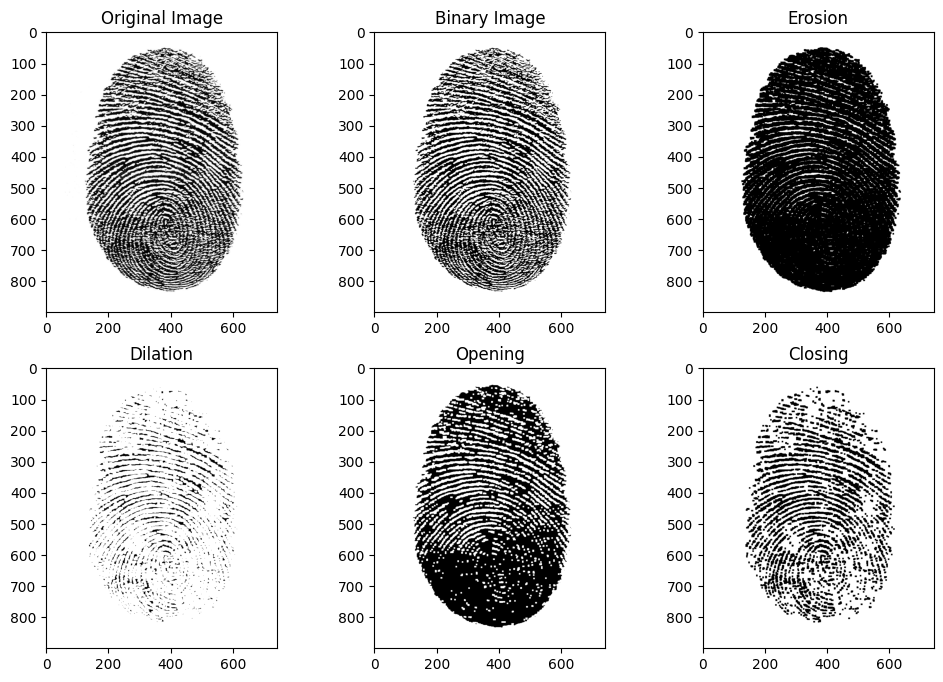

In [44]:
# Display the results


plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1), plt.imshow(fingerprint_image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image')
plt.subplot(2, 3, 3), plt.imshow(erosion_result, cmap='gray'), plt.title('Erosion')
plt.subplot(2, 3, 4), plt.imshow(dilation_result, cmap='gray'), plt.title('Dilation')
plt.subplot(2, 3, 5), plt.imshow(opening_result, cmap='gray'), plt.title('Opening')
plt.subplot(2, 3, 6), plt.imshow(closing_result, cmap='gray'), plt.title('Closing')

plt.show()

##Playing with different filter sizes to see the impact on the fingerprint image

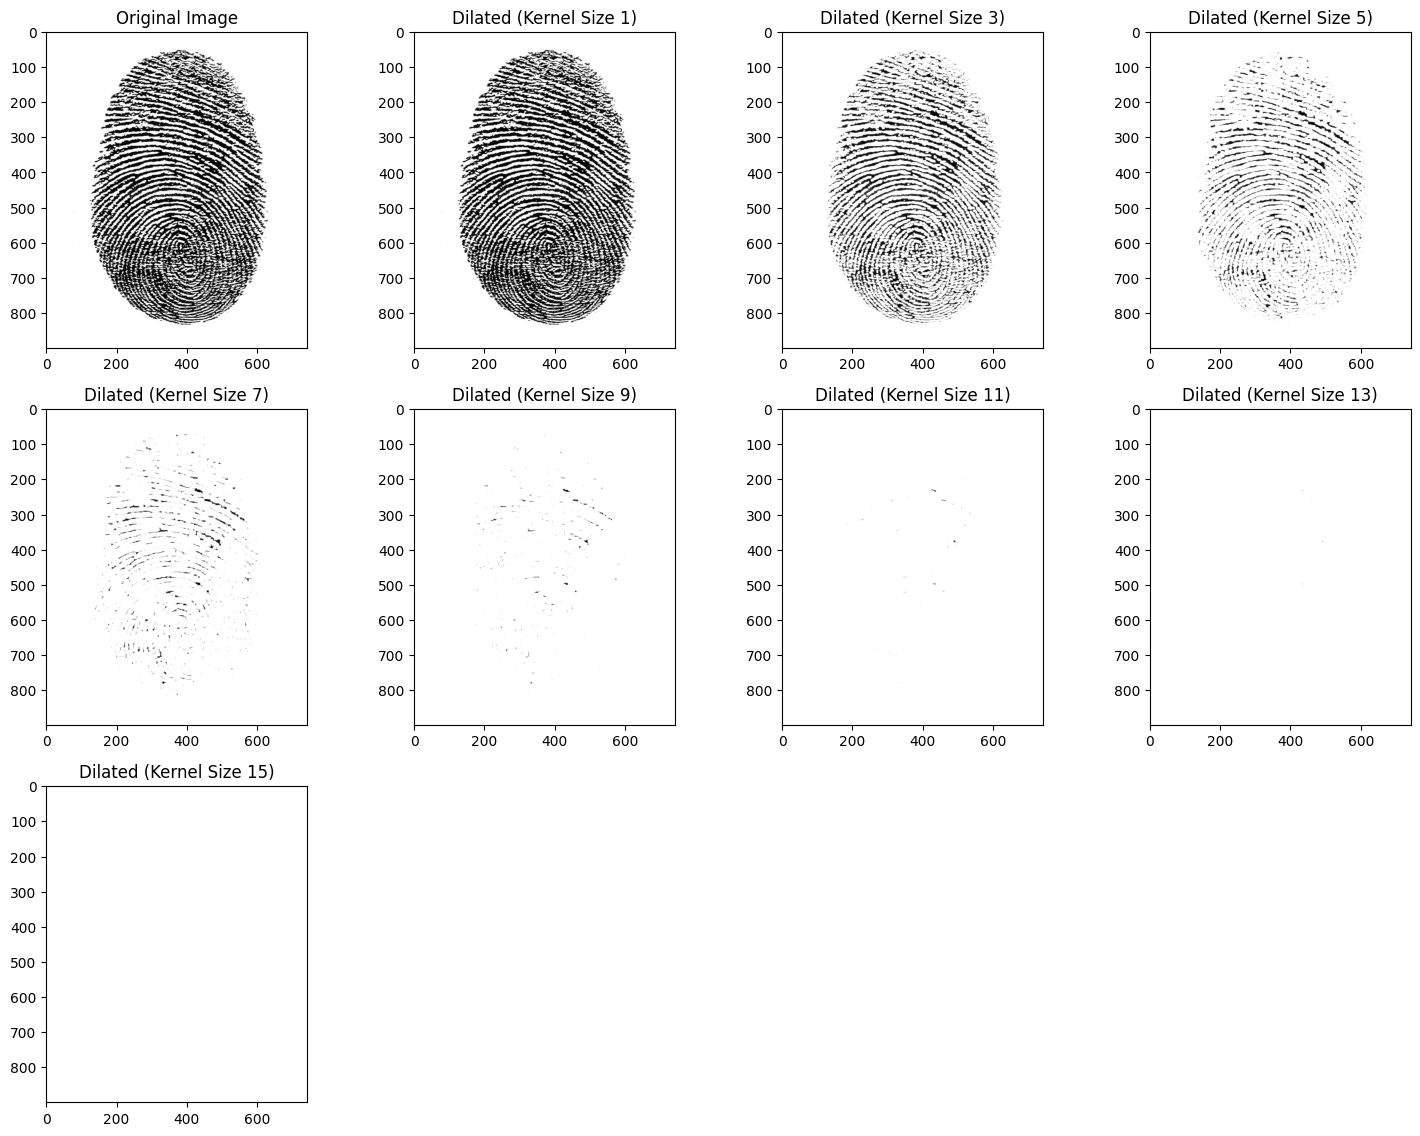

In [46]:

# List of kernel sizes to try
kernel_sizes = [1, 3, 5, 7, 9, 11, 13, 15]

# Define the number of rows and columns in the grid
num_rows = 4
num_cols = 4  # Adjust as needed

# Create a grid of subplots
plt.figure(figsize=(15, 15))

# Plot the original image
plt.subplot(num_rows, num_cols, 1)
plt.imshow(fingerprint_image, cmap='gray')
plt.title('Original Image')

# Loop through each kernel size and apply dilation
for i, kernel_size in enumerate(kernel_sizes):
    # Create a kernel with ones of size kernel_size x kernel_size
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Apply dilation
    dilated_image = cv2.dilate(fingerprint_image, kernel, iterations=1)

    # Plot the dilated image
    plt.subplot(num_rows, num_cols, i + 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title(f'Dilated (Kernel Size {kernel_size})')

plt.tight_layout()
plt.show()


###Note:
*  Dilation enlarges bright regions in an image. A larger kernel size may lead to over-expansion of features and result in the loss of finer details.
*  The shape of the structuring element (kernel) used in dilation matters. Instead of a square-shaped kernel, consider using a structuring element that better aligns with the orientation and shape of the minutiae.
** Implement adaptive dilation where you use a smaller kernel size in regions with intricate details (such as around minutiae) and a larger kernel size in smoother regions. This approach can be achieved through segmentation or feature-aware techniques.


###Trying Structuring Element (kernel) shapes: **Elipse**


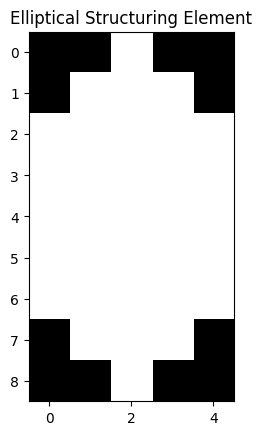

In [38]:
# Define the elliptical structuring element (kernel)
ellipse_size = (5, 9)  # Adjust the size of the ellipse (width, height)
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ellipse_size)

plt.imshow(ellipse_kernel, cmap='gray')
plt.title('Elliptical Structuring Element')
plt.show()

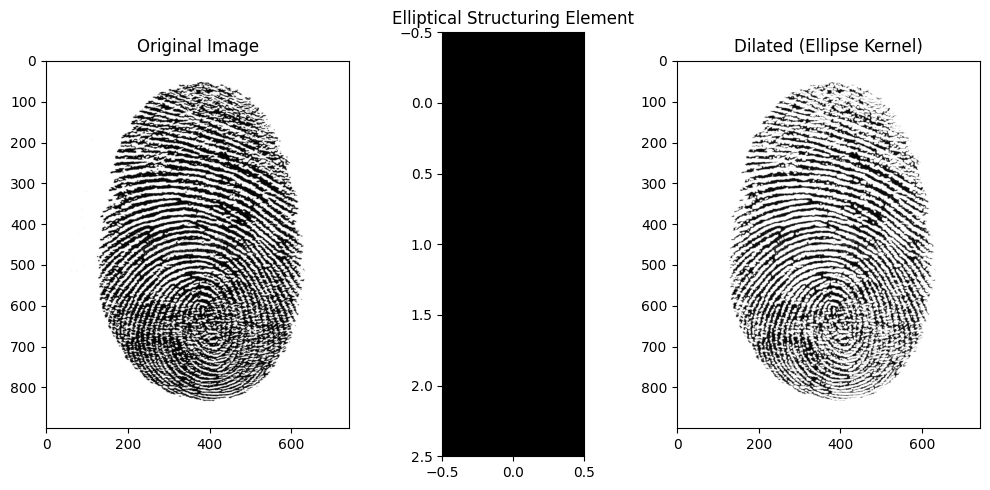

In [54]:

# Define the elliptical structuring element (kernel)
ellipse_size = (1, 3)  # Adjust the size of the ellipse (width, height)
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ellipse_size)

## Apply dilation with the elliptical kernel
dilated_image = cv2.dilate(fingerprint_image, ellipse_kernel, iterations=1)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(fingerprint_image, cmap='gray')
plt.title('Original Image')

# Plot the elliptical structuring element (kernel)
plt.subplot(1, 3, 2)
plt.imshow(ellipse_kernel, cmap='gray')
plt.title('Elliptical Structuring Element')

# Plot the dilated image after applying the elliptical kernel
plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated (Ellipse Kernel)')

plt.tight_layout()
plt.show()


## Applying erosion with diferent kernel sizes (ones matrix)

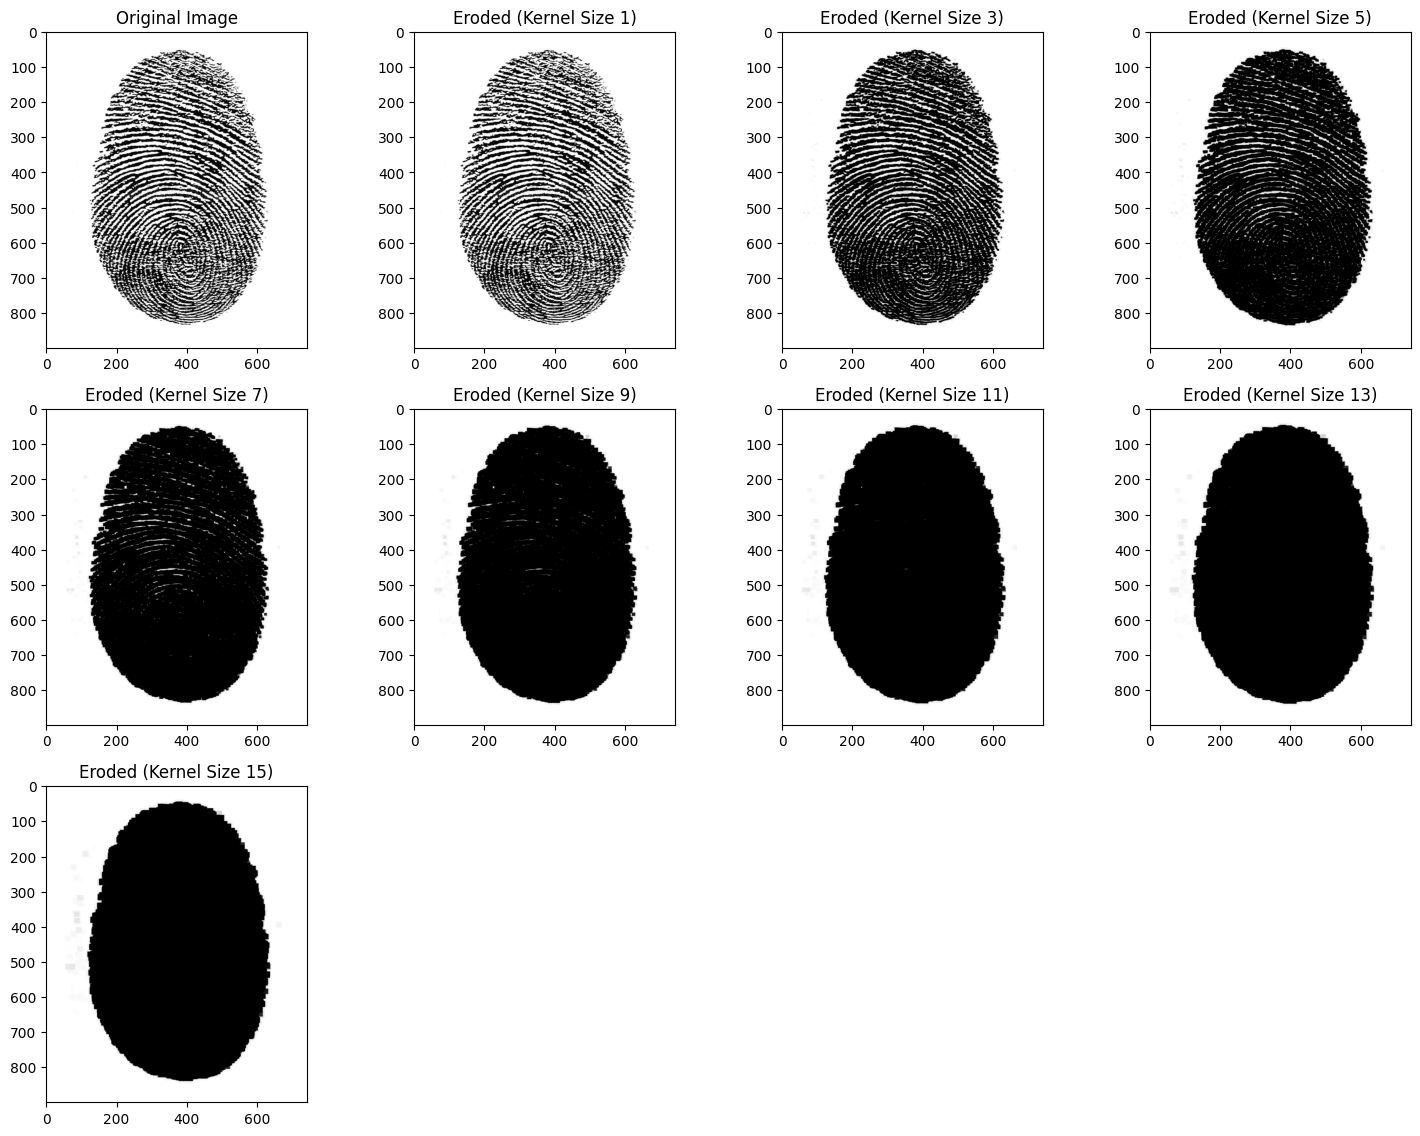

In [28]:

# List of kernel sizes to try
kernel_sizes = [1, 3, 5, 7, 9, 11, 13, 15]

# Define the number of rows and columns in the grid
num_rows = 4
num_cols = 4  # Adjust as needed

# Create a grid of subplots
plt.figure(figsize=(15, 15))

# Plot the original image
plt.subplot(num_rows, num_cols, 1)
plt.imshow(fingerprint_image, cmap='gray')
plt.title('Original Image')

# Loop through each kernel size and apply dilation
for i, kernel_size in enumerate(kernel_sizes):
    # Create a kernel with ones of size kernel_size x kernel_size
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Apply erosion
    eroded_image = cv2.erode(fingerprint_image, kernel, iterations=1)

    # Plot the dilated image
    plt.subplot(num_rows, num_cols, i + 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title(f'Eroded (Kernel Size {kernel_size})')

plt.tight_layout()
plt.show()
